Combining all our Yelp Data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
hov = pd.read_csv('./data/hovs_section.csv', index_col="Unnamed: 0")

In [7]:
hov.shape

(10019, 10)

In [8]:
steve = pd.read_csv('./data/steve.csv', index_col='index')

In [9]:
steve.shape

(8803, 10)

In [10]:
david = pd.read_csv('./data/david.csv', index_col='index')

In [11]:
david.shape

(11357, 10)

In [12]:
yelp_df = pd.concat([hov, steve, david])

There were some weird zip codes that were either typos or not from the Los Angeles area, so dropping those

In [14]:
yelp_df.drop(yelp_df[yelp_df['location']< 90000].index, inplace=True)

Dropping all duplicates

In [15]:
yelp_df.drop_duplicates(inplace=True)

Setting the type of restaurant to title case, for easier readability in plots.

In [16]:
yelp_df.type = [str.title(x) for x in yelp_df.type]

In [17]:
yelp_df.head()

,id,name,alias,type,rating,review_count,price,location,latitude,longitude
0,PEHM9AEqq0ca3vACyOMEwA,Lusy's Mediterranean Cafe & Grill,lusys-mediterranean-cafe-and-grill-van-nuys-2,Mediterranean,4.5,771,2.0,91401,34.186598,-118.431349
1,ja_cBagHfhI0eFJrw3BRTA,Kobee Factory,kobee-factory-van-nuys-2,Mideastern,4.5,536,2.0,91401,34.179265,-118.440370
2,vWuft2V5ZKKWRPzQUHuKDw,Nat's Early Bite Coffee Shop,nats-early-bite-coffee-shop-sherman-oaks,Diners,4.5,1069,2.0,91401,34.172400,-118.440530
3,DfmaMh5rJQ_o9vEvhfUDgQ,Uncle Tony's Pizzeria,uncle-tonys-pizzeria-north-hollywood,Italian,4.0,1164,2.0,91606,34.187380,-118.416558
4,Mfa5dHJKcY4K-c3IQIxKkA,Krimsey's Cajun Kitchen,krimseys-cajun-kitchen-north-hollywood-2,Vegan,4.5,870,2.0,91606,34.186299,-118.413965


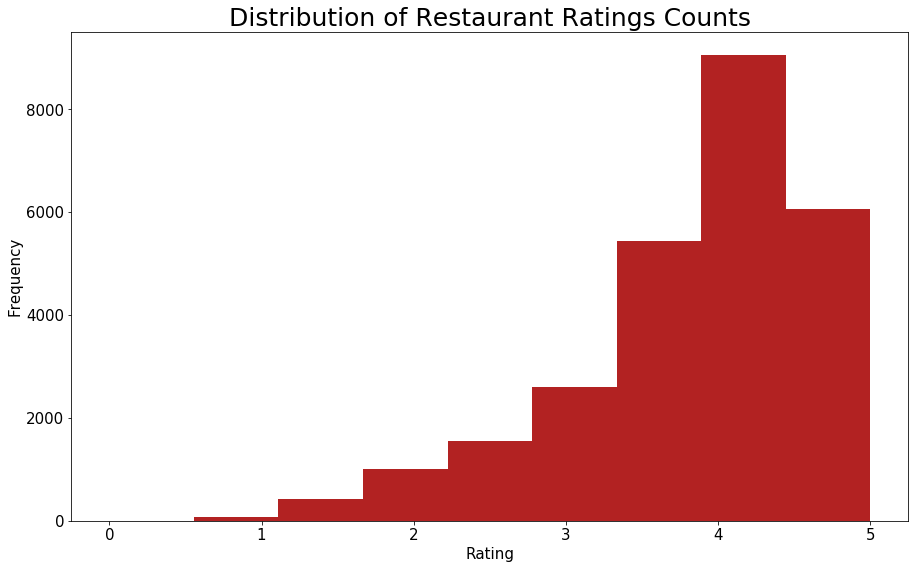

In [18]:
yelp_df.rating.hist(figsize=(15,9), grid=False, color='firebrick', bins=9)
plt.title('Distribution of Restaurant Ratings Counts', fontsize='25')
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Rating", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('./figures/rating_dist.png', dpi=200);

As we can see, the distribution of restaurant ratings is skewed to the left. The majority of restaurants are between 3.5 and 4.5, with very few below 3 stars.

In [19]:
yelp_df.drop(yelp_df[yelp_df.review_count == 0].index, inplace=True)

I dropped the observations that had 0 reviews, because as you'll see below, I wanted to log-transform the variable to deskew it, but you can't take a natural log of 0!

In [20]:
yelp_df['log_reviews'] = np.log(yelp_df.review_count)

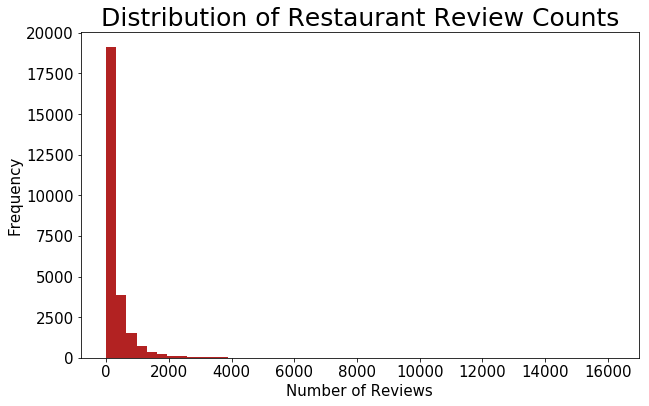

In [21]:
yelp_df.review_count.hist(figsize=(10,6), grid=False, bins=50, color='firebrick')
plt.title('Distribution of Restaurant Review Counts', fontsize='25')
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Number of Reviews", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('./figures/review_count_dist.png', dpi=200);

Indeed, the distribution of restaurant review counts is very heavily skewed to the right. The vast majority of restaurants have less than 500 reviews, but very few have thousands and the most reviewed restaurant in our dataset had over 16,000 reviews!

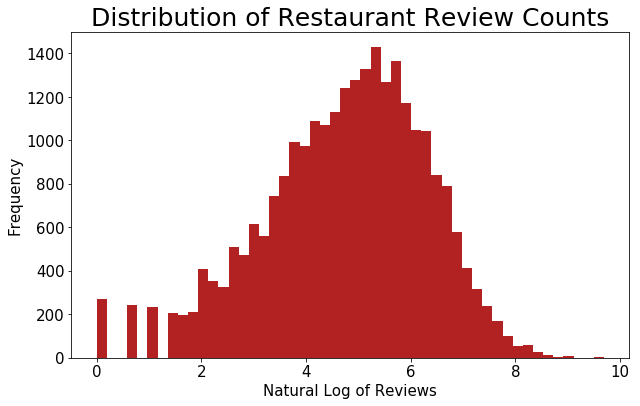

In [22]:
yelp_df.log_reviews.hist(figsize=(10,6), grid=False, bins=50, color='firebrick')
plt.title('Distribution of Restaurant Review Counts', fontsize='25')
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Natural Log of Reviews", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('./figures/log_review_dist.png', dpi=200);

As we can see, log-transforming our variable made it much more normally distributed. 

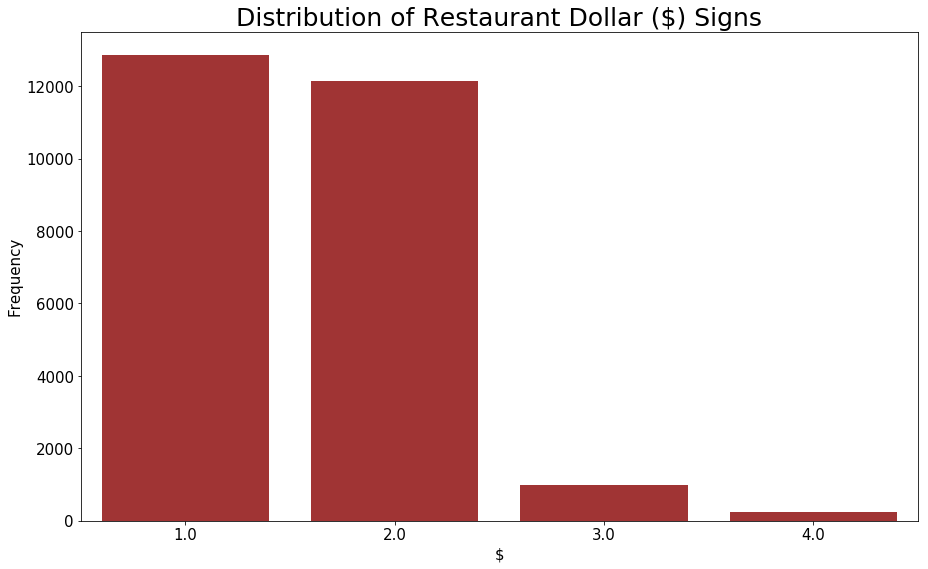

In [23]:
plt.figure(figsize=(15,9))
sns.countplot(yelp_df.price, color='firebrick')
plt.title('Distribution of Restaurant Dollar ($) Signs', fontsize='25')
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("$", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('./figures/price_dist.png', dpi=200);

Our primary explanatory variable of interest, restaurant dollar signs, is also not normally distributed. The vast majority of restaurants are relatively inexpensive (less than 3 dollar signs). 

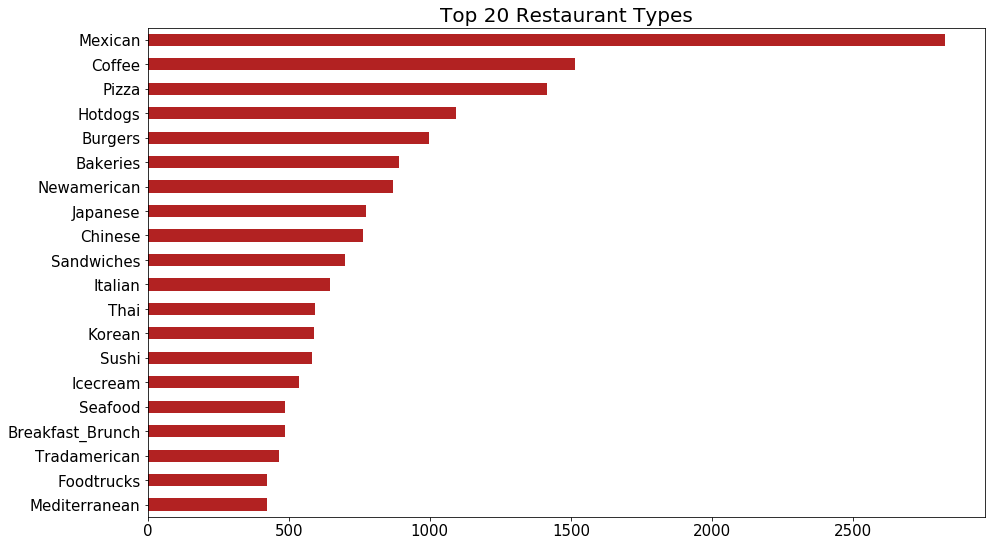

In [24]:
yelp_df.type.value_counts(ascending=True)[217:].plot(kind='barh', figsize=(15,9), fontsize=15, color='firebrick')
plt.title("Top 20 Restaurant Types", fontsize=20)
plt.savefig('./figures/restaurant_types.png', dpi=200)

There are unfortunately over 200 types of restaurants in our yelp dataset, with the distribution being, again, very right skewed (i.e. there are many one-off types that only have 1, or very few, restaurants of that type). Regardless, the plot above shows the top 20 most prevalent restaurant types, with Mexican being the most common.

In [25]:
yelp_dummies = pd.get_dummies(yelp_df, columns=['price', 'rating', 'type'])

Getting dummies for our categorical variables.

In [26]:
yelp_dummies.head()

,id,name,alias,review_count,location,latitude,longitude,log_reviews,price_1.0,price_2.0,...,type_Venues,type_Vietnamese,type_Vitaminssupplements,type_Waffles,type_Whiskeybars,type_Wine_Bars,type_Winetastingroom,type_Womenscloth,type_Wraps,type_Yoga
0,PEHM9AEqq0ca3vACyOMEwA,Lusy's Mediterranean Cafe & Grill,lusys-mediterranean-cafe-and-grill-van-nuys-2,771,91401,34.186598,-118.431349,6.647688,0,1,...,0,0,0,0,0,0,0,0,0,0
1,ja_cBagHfhI0eFJrw3BRTA,Kobee Factory,kobee-factory-van-nuys-2,536,91401,34.179265,-118.440370,6.284134,0,1,...,0,0,0,0,0,0,0,0,0,0
2,vWuft2V5ZKKWRPzQUHuKDw,Nat's Early Bite Coffee Shop,nats-early-bite-coffee-shop-sherman-oaks,1069,91401,34.172400,-118.440530,6.974479,0,1,...,0,0,0,0,0,0,0,0,0,0
3,DfmaMh5rJQ_o9vEvhfUDgQ,Uncle Tony's Pizzeria,uncle-tonys-pizzeria-north-hollywood,1164,91606,34.187380,-118.416558,7.059618,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Mfa5dHJKcY4K-c3IQIxKkA,Krimsey's Cajun Kitchen,krimseys-cajun-kitchen-north-hollywood-2,870,91606,34.186299,-118.413965,6.768493,0,1,...,0,0,0,0,0,0,0,0,0,0


In [27]:
yelp_grouped = yelp_dummies.groupby('location').sum()

Grouping our variables by zip code to be able to merge it with our housing data. 

In [28]:
yelp_grouped.columns[:20]

Index(['review_count', 'latitude', 'longitude', 'log_reviews', 'price_1.0',
       'price_2.0', 'price_3.0', 'price_4.0', 'rating_1.0', 'rating_1.5',
       'rating_2.0', 'rating_2.5', 'rating_3.0', 'rating_3.5', 'rating_4.0',
       'rating_4.5', 'rating_5.0', 'type_Acaibowls', 'type_Afghani',
       'type_African'],
      dtype='object')

---

Importing the Los Angeles County housing data.

In [29]:
lacounty = pd.read_csv('./data/lacounty.csv', index_col='index')

Keeping only the data that we want: total home values, and location data (zip codes and coordinates).

In [30]:
properties = lacounty[['totalvalue', 'location', 'latitude', 'longitude']]

In [31]:
properties.head()

,totalvalue,location,latitude,longitude
index,,,,
5,1295400.0,91326,34.2853,-118.535
6,619286.0,91326,34.2849,-118.534
27,618184.0,91326,34.2842,-118.534
34,748768.0,91326,34.2829,-118.535
43,613655.0,91326,34.2823,-118.535


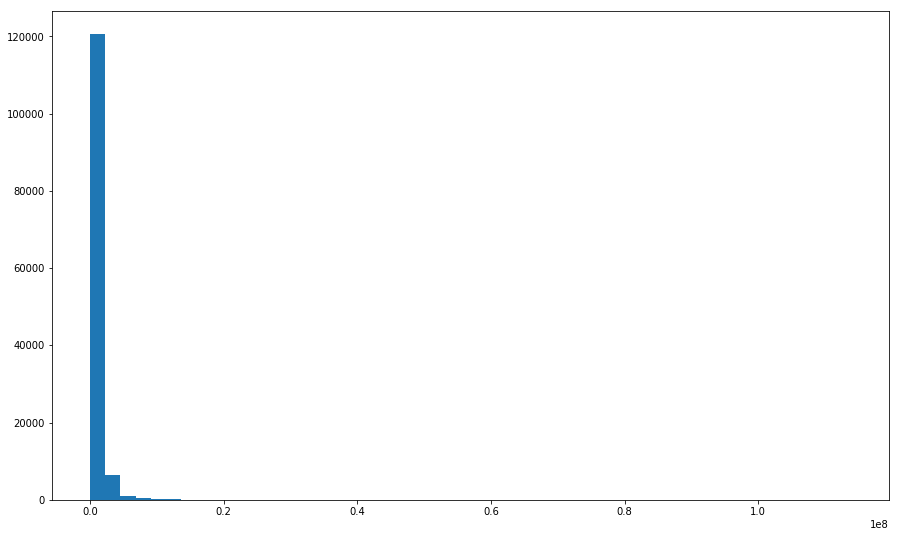

In [32]:
properties.totalvalue.hist(figsize=(15,9), bins=50, grid=False);

The distribution of home prices are also very heavily skewed to the right, with the vast majority of homes being under \\$1,000,000, but very few homes being more than that. As a result, we decided to keep only homes that were over \\$200,000 and under \\$2,000,000.

In [33]:
properties = properties[(properties.totalvalue > 200_000) & (properties.totalvalue < 2_000_000)]

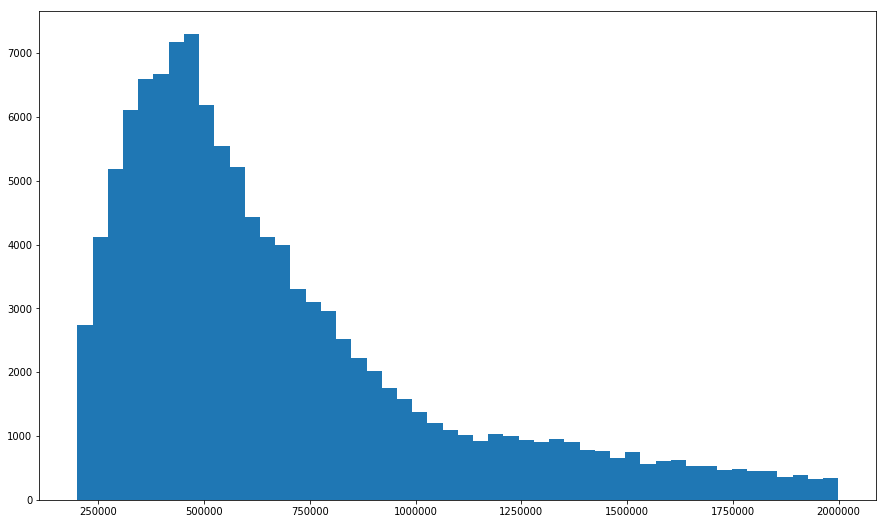

In [34]:
properties.totalvalue.hist(figsize=(15,9), bins=50, grid=False);

As we can see, the plot looks a lot better, but it is still quite skewed to the right, so I will log-transform this as well.

In [35]:
properties['logvalue'] = np.log(properties.totalvalue)

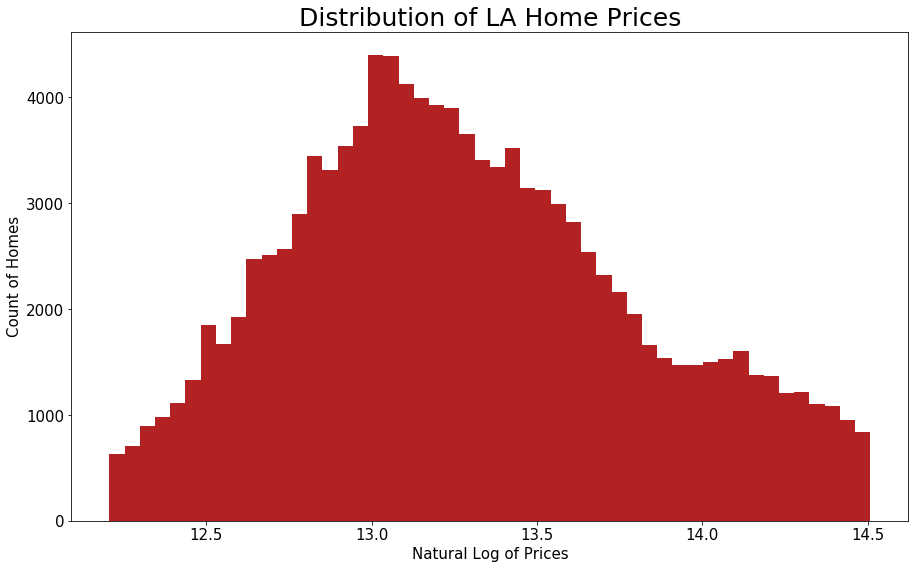

In [36]:
properties.logvalue.hist(figsize=(15,9), grid=False, bins=50, color='firebrick')
plt.title('Distribution of LA Home Prices', fontsize='25')
plt.ylabel("Count of Homes", fontsize=15)
plt.xlabel("Natural Log of Prices", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('./figures/home_value_dist.png', dpi=200);

Now we can see that the log-transformed version looks to be much more normally distributed. Below we group the housing property by zip code as well, but this time using the mean.

In [37]:
prop_grouped = properties.groupby('location').mean()

Merging both dataframes by zip code

In [38]:
groupdf = pd.merge(prop_grouped, yelp_grouped, on='location')

Checking the average number of restaurants per zip code

In [39]:
rests_per_zip = groupdf['price_1.0'] + groupdf['price_2.0'] + groupdf['price_3.0'] + groupdf['price_4.0']

In [40]:
rests_per_zip.mean()

181.45631067961165

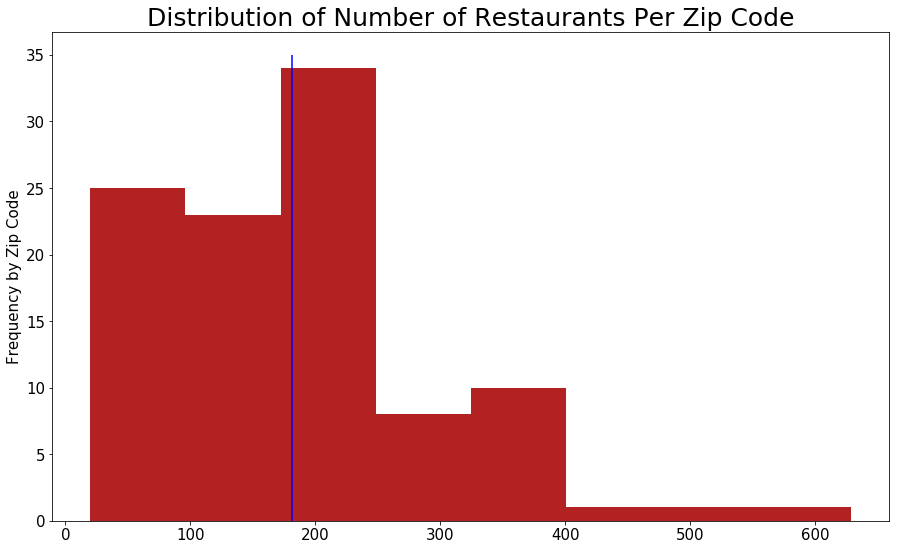

In [41]:
rests_per_zip.plot(kind='hist', figsize=(15,9), bins=8, color='firebrick')
plt.title('Distribution of Number of Restaurants Per Zip Code', fontsize=25)
plt.vlines(rests_per_zip.mean(), 0, 35, colors='blue', label='181')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Frequency by Zip Code', fontsize=15)
plt.savefig('./figures/rests_per_zip.png', dpi=200)

As we can see, the distribution of the number of restaurants per zip code is also skewed to the right. Most zip codes have less than 300 restaurants in them, with the average being 182 (the vertical blue line).

Now I'm going to save the current dataframe into a CSV file and in the next notebook we'll try some modelling on this grouped data. 

In [44]:
groupdf.to_csv('./data/groupdf.csv')

In [38]:
# combo = pd.concat([df, properties], sort=True)

In [ ]:
# combo.isna().sum()

In [42]:
# price_dummies = pd.get_dummies(data=combo.price, columns="price")

In [173]:
# combo_dummies = pd.concat([combo, price_dummies], axis=1)

In [ ]:
# clustering = dbscan(combo[['latitude', 'longitude']])

In [139]:
# groupby = combo_dummies.groupby(by='location')

In [ ]:
# combo_dummies.sort_values(by='location')

In [ ]:
# groupby.isna().sum()

In [72]:
# groupby.dropna(inplace=True)

In [177]:
import statsmodels.api as sm

In [842]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [762]:
X = groupdf[['price_1.0',
             'price_2.0', 
            'price_3.0', 
            'price_4.0', 
            'rating_1.0', 
            'rating_2.0', 
            'rating_2.5', 
            'rating_3.0',
            'rating_3.5', 
            'rating_4.0', 
            'rating_4.5', 
            'rating_5.0', 
           'type_mexican',
           'type_coffee',
           'type_pizza',
           'type_hotdogs',
           'type_burgers',
           'type_bakeries',
            'log_reviews']]

In [763]:
X.head()

,price_1.0,price_2.0,price_3.0,price_4.0,rating_1.0,rating_2.0,rating_2.5,rating_3.0,rating_3.5,rating_4.0,rating_4.5,rating_5.0,type_mexican,type_coffee,type_pizza,type_hotdogs,type_burgers,type_bakeries,log_reviews
location,,,,,,,,,,,,,,,,,,,
90001,135.0,52.0,0.0,0.0,0.0,21.0,10.0,21.0,32.0,34.0,41.0,20.0,44.0,6.0,8.0,10.0,22.0,5.0,502.254649
90002,39.0,4.0,0.0,0.0,2.0,4.0,2.0,0.0,0.0,11.0,8.0,6.0,2.0,4.0,4.0,4.0,6.0,2.0,98.170200
90003,118.0,18.0,2.0,2.0,2.0,17.0,10.0,18.0,26.0,16.0,20.0,16.0,30.0,0.0,11.0,8.0,19.0,4.0,383.669881
90004,98.0,130.0,5.0,0.0,0.0,2.0,10.0,15.0,43.0,102.0,45.0,14.0,11.0,19.0,8.0,4.0,3.0,17.0,1115.333722
90005,73.0,155.0,4.0,0.0,0.0,2.0,4.0,21.0,41.0,102.0,61.0,1.0,3.0,20.0,0.0,3.0,0.0,5.0,1236.250662


In [764]:
y = groupdf.logvalue

In [765]:
lr = LinearRegression()

In [766]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [822]:
sc = StandardScaler()

In [823]:
X_train_sc = sc.fit_transform(X_train)

In [824]:
X_test_sc = sc.transform(X_test)

In [825]:
lr.fit(X_train_sc, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [826]:
lr.score(X_train_sc, y_train)

0.6953214685824456

In [827]:
lr.score(X_test_sc, y_test)

-0.09584934084152243

In [835]:
lasso = Lasso(alpha=1, max_iter=50000)

In [839]:
lasso.fit(X_train, y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=50000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [840]:
lasso.score(X_train, y_train)

0.5871185812453505

In [841]:
lasso.score(X_test, y_test)

0.2406944379227911

In [843]:
ridge = Ridge()

In [844]:
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [845]:
ridge.score(X_train, y_train)

0.695318865772713

In [846]:
ridge.score(X_test, y_test)

-0.08889790084385263

In [774]:
rf = RandomForestRegressor()

In [775]:
rf.fit(X_train, y_train)

/Users/Hovanes/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [776]:
rf.score(X_train, y_train)

0.8990939781509323

In [777]:
rf.score(X_test, y_test)

0.4117120555085353

In [778]:
X = sm.add_constant(X)

/Users/Hovanes/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [779]:
model = sm.OLS(y, X).fit()

In [780]:
smpredictions = model.predict(X)

In [781]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logvalue   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     7.161
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           7.54e-11
Time:                        16:34:03   Log-Likelihood:                -27.506
No. Observations:                 103   AIC:                             95.01
Df Residuals:                      83   BIC:                             147.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.5785      0.088    154.891      0.000      13.404      13.753
price_1.0        -0.0263      0.011     -2.304      0.024      -0.049      -0.004
price_2.0        -0.0166      0.012     -1.395      0.167      -0.040       0.007
price_3.0        -0.0190      0.012     -1.565      0.121      -0.043       0.005
price_4.0        -0.0231      0.017     -1.391      0.168      -0.056       0.010
rating_1.0        0.0051      0.042      0.121      0.904      -0.079       0.089
rating_2.0        0.0183      0.017      1.103      0.273      -0.015       0.051
rating_2.5        0.0270      0.016      1.733      0.087      -0.004       0.058
rating_3.0        0.0233      0.013      1.823      0.072      -0.002       0.049
rating_3.5        0.0228      0.013      1.720      0.089      -0.004       0.049
rating_4.0        0.0183      0.014      1.332      0.187      -0.009       0.046
rating_4.5        0.0195      0.013      1.527      0.131      -0.006       0.045
rating_5.0        0.0103      0.016      0.643      0.522      -0.022       0.042
type_mexican     -0.0008      0.005     -0.168      0.867      -0.011       0.009
type_coffee      -0.0126      0.009     -1.453      0.150      -0.030       0.005
type_pizza        0.0050      0.008      0.622      0.536      -0.011       0.021
type_hotdogs     -0.0095      0.013     -0.749      0.456      -0.035       0.016
type_burgers     -0.0121      0.010     -1.250      0.215      -0.031       0.007
type_bakeries     0.0185      0.010      1.885      0.063      -0.001       0.038
log_reviews       0.0002      0.001      0.261      0.794      -0.002       0.002
==============================================================================
Omnibus:                        5.446   Durbin-Watson:                   1.402
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                4.802
Skew:                          -0.474   Prob(JB):                       0.0906
Kurtosis:                       3.471   Cond. No.                     2.70e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [782]:
model.pvalues[model.pvalues<0.05]

const        5.611666e-104
price_1.0     2.371316e-02
dtype: float64

In [847]:
model.pvalues[model.pvalues<0.1]

const            5.611666e-104
price_1.0         2.371316e-02
rating_2.5        8.673138e-02
rating_3.0        7.195180e-02
rating_3.5        8.910859e-02
type_bakeries     6.291120e-02
dtype: float64

In [783]:
model.params[model.params.index.isin(model.pvalues[model.pvalues<0.05].index)]

const        13.578454
price_1.0    -0.026265
dtype: float64

In [848]:
model.params[model.params.index.isin(model.pvalues[model.pvalues<0.1].index)]

const            13.578454
price_1.0        -0.026265
rating_2.5        0.026984
rating_3.0        0.023272
rating_3.5        0.022828
type_bakeries     0.018454
dtype: float64

In [784]:
robust = sm.RLM(y, X).fit()

In [785]:
robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               logvalue   No. Observations:                  103
Model:                            RLM   Df Residuals:                       83
Method:                          IRLS   Df Model:                           19
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 25 Apr 2019                                         
Time:                        16:35:16                                         
No. Iterations:                    43                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.4992      0.081    166.220      0.000      13.340      13.658
price_1.0        -0.0217      0.011     -2.051      0.040      -0.042      -0.001
price_2.0        -0.0140      0.011     -1.266      0.206      -0.036       0.008
price_3.0        -0.0160      0.011     -1.421      0.155      -0.038       0.006
price_4.0        -0.0167      0.015     -1.081      0.279      -0.047       0.014
rating_1.0        0.0100      0.039      0.256      0.798      -0.066       0.086
rating_2.0        0.0152      0.015      0.992      0.321      -0.015       0.045
rating_2.5        0.0255      0.014      1.768      0.077      -0.003       0.054
rating_3.0        0.0225      0.012      1.902      0.057      -0.001       0.046
rating_3.5        0.0209      0.012      1.701      0.089      -0.003       0.045
rating_4.0        0.0183      0.013      1.436      0.151      -0.007       0.043
rating_4.5        0.0177      0.012      1.496      0.135      -0.006       0.041
rating_5.0        0.0121      0.015      0.818      0.413      -0.017       0.041
type_mexican     -0.0035      0.005     -0.764      0.445      -0.012       0.005
type_coffee      -0.0115      0.008     -1.423      0.155      -0.027       0.004
type_pizza        0.0050      0.007      0.664      0.507      -0.010       0.020
type_hotdogs     -0.0166      0.012     -1.407      0.159      -0.040       0.007
type_burgers     -0.0171      0.009     -1.906      0.057      -0.035       0.000
type_bakeries     0.0085      0.009      0.933      0.351      -0.009       0.026
log_reviews     2.29e-06      0.001      0.003      0.998      -0.002       0.002
=================================================================================

If the model instance has been used for another fit with different fit
parameters, then the fit options might not be the correct ones anymore .
"""

In [786]:
robust.pvalues[robust.pvalues<0.05]

const        0.000000
price_1.0    0.040273
dtype: float64

In [787]:
robust.params[robust.params.index.isin(robust.pvalues[robust.pvalues<0.05].index)]

const        13.499203
price_1.0    -0.021658
dtype: float64

In [93]:
combo['coordinates'] = combo['latitude'].map(str) + ',' + combo['longitude'].map(str)

In [95]:
from geopy import distance

In [ ]:
distance.distance(combo.coordinates)

In [226]:
def coord_distance(lat1, long1, lat2, long2):
    coords_1 = (lat1, long1)
    coords_2 = (lat2, long2)

    return distance.distance(coords_1, coords_2).mi

In [278]:
def restaurant_distance(df, loc):
    lst = []
    for i in range(len(df.index)):
        lst.append(coord_distance(yelp_dummies.loc[loc, 'latitude'], 
                           yelp_dummies.loc[loc, 'longitude'], 
                           df.iloc[i]['latitude'], 
                           df.iloc[i]['longitude']))
    df.index = lst